# Exercise 4

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
dataBase = pd.read_csv('train.csv')
dataBase

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


---
## Problem 1:
### Predicting SalePrice using GrLivArea
#### Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71. In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.


### 1a: Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

In [3]:
saleGr = pd.DataFrame(dataBase[['SalePrice', 'GrLivArea']])
salePrice = pd.DataFrame(dataBase['SalePrice'])
grLivArea = pd.DataFrame(dataBase['GrLivArea'])

In [4]:
saleGr.describe()

,SalePrice,GrLivArea
count,1460.000000,1460.000000
mean,180921.195890,1515.463699
std,79442.502883,525.480383
min,34900.000000,334.000000
25%,129975.000000,1129.500000
50%,163000.000000,1464.000000
75%,214000.000000,1776.750000
max,755000.000000,5642.000000


#### Correlation of SalePrice and GrLivArea

In [5]:
f = plt.figure(figsize=(12,12))
correlation = saleGr.corr()
print(correlation['SalePrice'])

SalePrice    1.000000
GrLivArea    0.708624
Name: SalePrice, dtype: float64


<Figure size 864x864 with 0 Axes>

<AxesSubplot:>

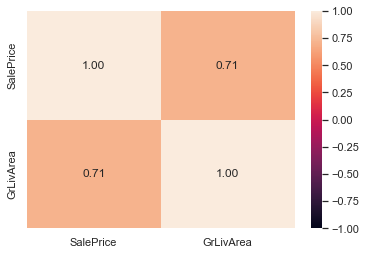

In [6]:
sb.heatmap(saleGr.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [7]:
# Train Set : 1168/1460 samples (80%)
salePrice_train = pd.DataFrame(salePrice[:1168])
grLivArea_train = pd.DataFrame(grLivArea[:1168])

# Test set : 292/1460 samples (20%)
salePrice_test = pd.DataFrame(salePrice[-292:])
grLivArea_test = pd.DataFrame(grLivArea[-292:])

print("Train Set :", salePrice_train.shape, grLivArea_train.shape)
print("Test Set  :", salePrice_test.shape, grLivArea_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [8]:
salePrice_train.describe()

,SalePrice
count,1168.000000
mean,180590.277397
std,78815.697902
min,34900.000000
25%,129900.000000
50%,162950.000000
75%,214000.000000
max,755000.000000


In [9]:
grLivArea_train.describe()

,GrLivArea
count,1168.000000
mean,1502.077055
std,506.607507
min,334.000000
25%,1120.750000
50%,1456.000000
75%,1761.750000
max,4676.000000


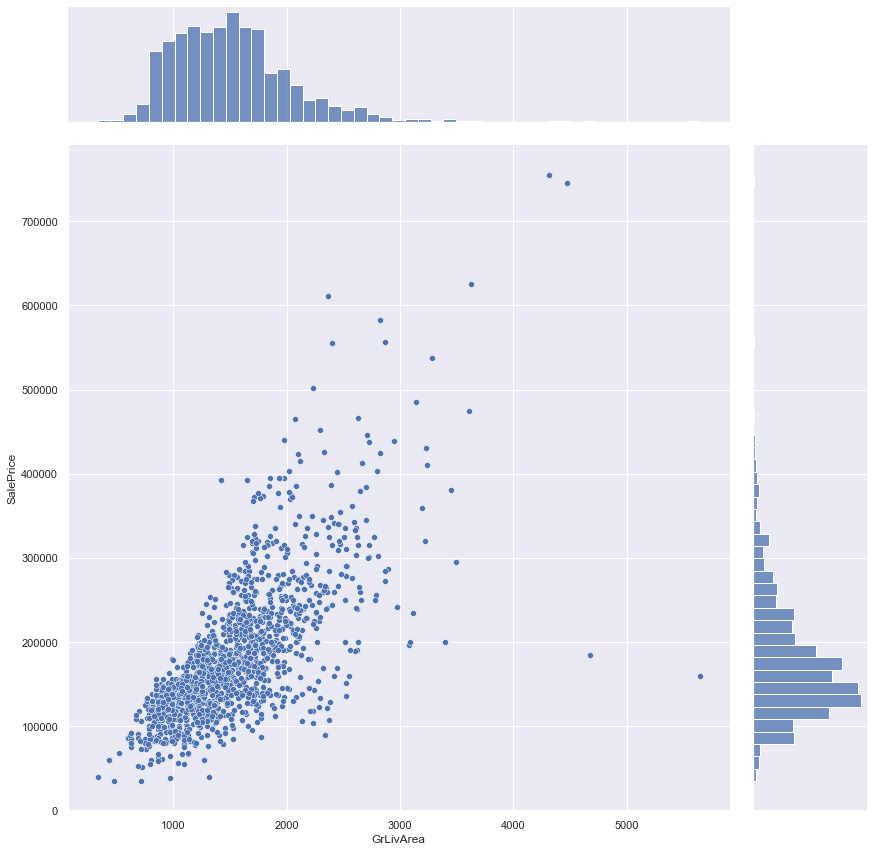

In [10]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([salePrice_train, grLivArea_train], axis = 1).reindex(salePrice_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = dataBase, x = "GrLivArea", y = "SalePrice", height = 12)

<AxesSubplot:>

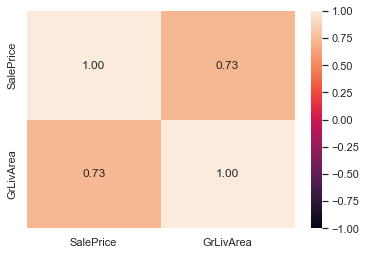

In [11]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [12]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [13]:
linreg.fit(grLivArea_train, salePrice_train)

LinearRegression()

You have *trained* the model to fit the following formula.

>  Regression Problem :  SalePrice = $a$ $\times$ grLivArea + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

#### Answer [1a]: 

In [14]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9592.75130193]
Coefficients 	: a =  [[113.84071513]]


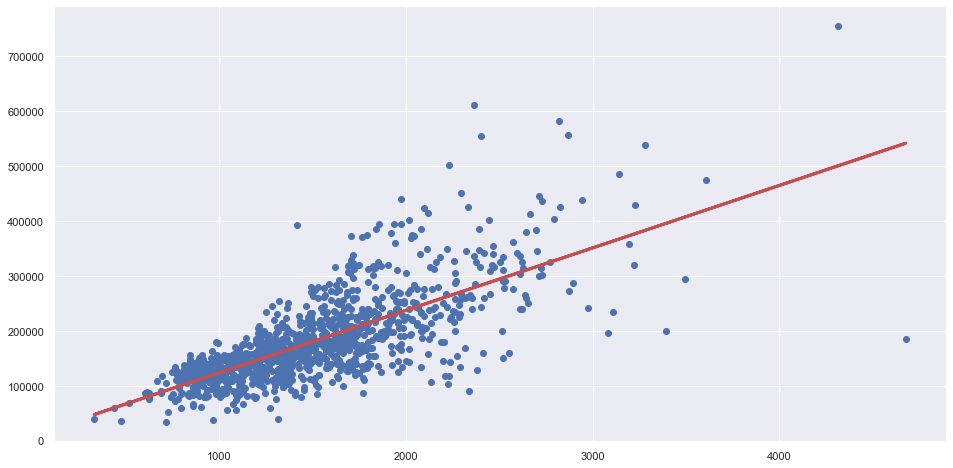

In [15]:
# Formula for the Regression line
regline_x = grLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * grLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_train, salePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

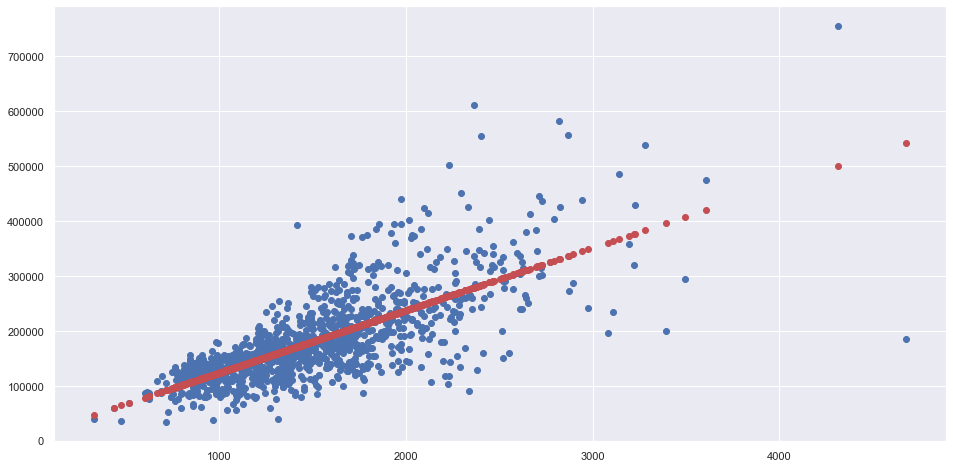

In [16]:
# Predict Total values corresponding to HP Train
salePrice_train_pred = linreg.predict(grLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_train, salePrice_train)
plt.scatter(grLivArea_train, salePrice_train_pred, color = "r")
plt.show()

### 1b: Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

#### Goodness of Fit of Model for Train Set
#### Check how good the predictions are on the Train Set.    
#### Metrics : Explained Variance and Mean Squared Error.

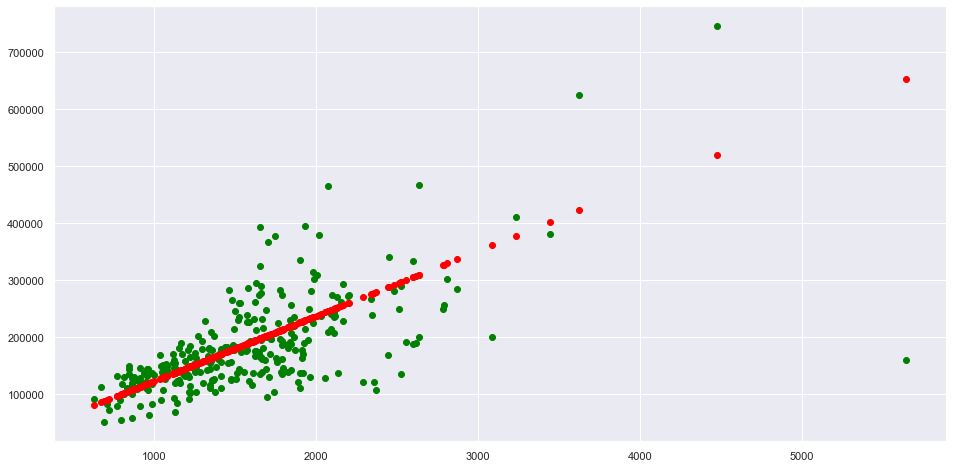

In [17]:
# Test the Linear Regression model `linreg` using the Test Set.   

# Predict Total values corresponding to grLivArea_test
salePrice_test_pred = linreg.predict(grLivArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_test, salePrice_test, color = "green")
plt.scatter(grLivArea_test, salePrice_test_pred, color = "red")
plt.show()

#### Answer [1b]:

In [18]:
# Explained Variance (R^2)
test_GrLiVArea = linreg.score(grLivArea_test, salePrice_test)
print("Explained Variance (R^2) \t:", test_GrLiVArea)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

GrLiVAreaMse = mean_sq_err(salePrice_test, salePrice_test_pred)
print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)

Explained Variance (R^2) 	: 0.3683894557150511
Mean Squared Error (MSE) 	: 4235182093.21243


---
## Question 2

### Predicting SalePrice using Other Variables

#### Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

In [19]:
tB = pd.DataFrame(dataBase['TotalBsmtSF'])
gA = pd.DataFrame(dataBase['GarageArea'])

saleTBGA = pd.DataFrame(dataBase[['SalePrice', 'TotalBsmtSF', 'GarageArea']])

SalePrice      1.000000
TotalBsmtSF    0.613581
GarageArea     0.623431
Name: SalePrice, dtype: float64


<AxesSubplot:>

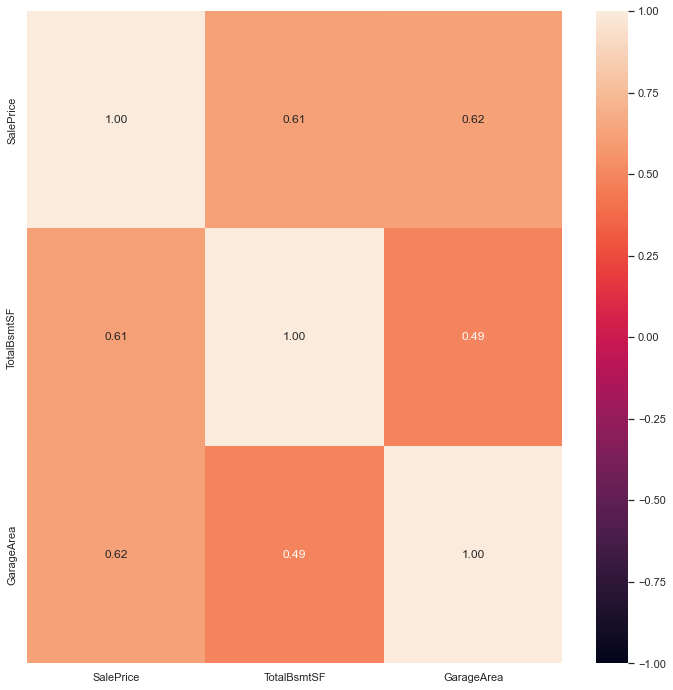

In [20]:
f = plt.figure(figsize=(12,12))
correlation = saleTBGA.corr()
print(correlation['SalePrice'])
sb.heatmap(saleTBGA.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [21]:
tB.describe()

,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


In [22]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
tB_train, tB_test, gA_train, gA_test = train_test_split(tB, gA, test_size = 0.20)

# Check the sample sizes
print("Train Set :", tB_train.shape, gA_train.shape)
print("Test Set  :", tB_test.shape, gA_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


#### For TotalBsmtSF

You have *trained* the model to fit the following formula.

>  Regression Problem :  SalePrice = $a$ $\times$ TotalBsmtSF + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

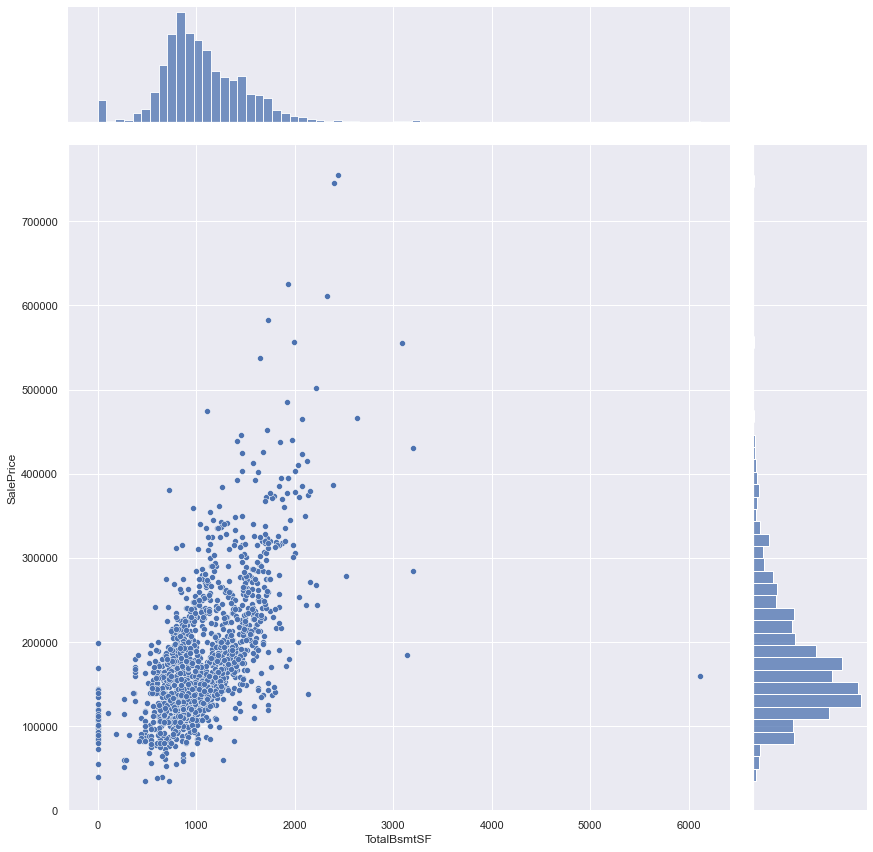

In [23]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([salePrice_train, tB_train], axis = 1).reindex(salePrice_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = dataBase, x = "TotalBsmtSF", y = "SalePrice", height = 12)

In [24]:
# Train the Linear Regression model
linreg.fit(tB_train, salePrice_train)

LinearRegression()

#### For tB_train 

Intercept 	: b =  [161173.82366729]
Coefficients 	: a =  [[18.30698463]]


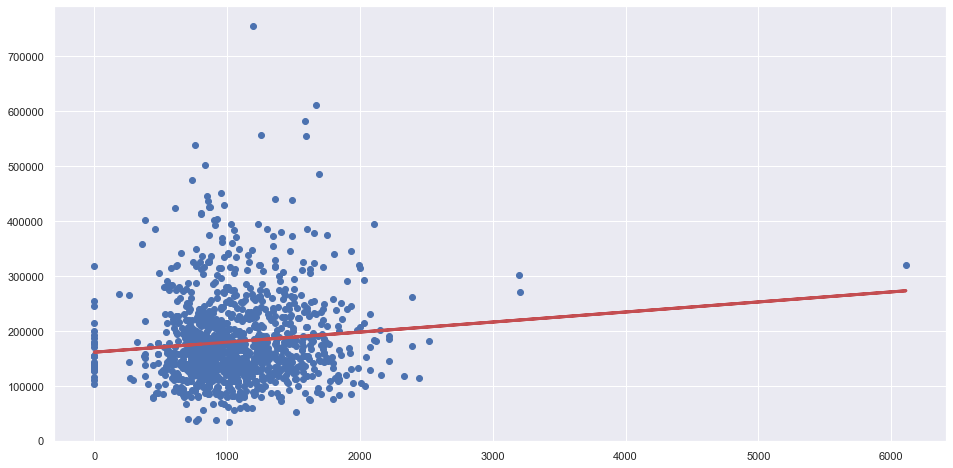

In [25]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = tB_train
regline_y = linreg.coef_ * tB_train + linreg.intercept_  

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(tB_train, salePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [26]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(tB_train, salePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(salePrice_train, salePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.010480475141527945
Mean Squared Error (MSE) 	: 2883319244.120251


#### For tB_test

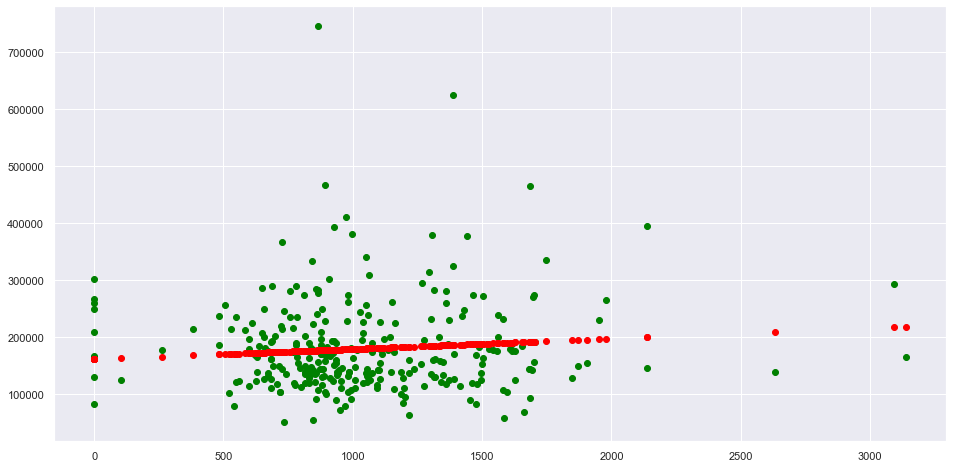

In [27]:
# Predict Total values corresponding to grLivArea_test
salePrice_test_pred = linreg.predict(tB_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(tB_test, salePrice_test, color = "green")
plt.scatter(tB_test, salePrice_test_pred, color = "red")
plt.show()

In [28]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(tB_test, salePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(salePrice_test, salePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: -0.0016613866786676645
Mean Squared Error (MSE) 	: 6716509733.266838


#### For GarageArea

You have *trained* the model to fit the following formula.

>  Regression Problem :  SalePrice = $a$ $\times$ GarageArea + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

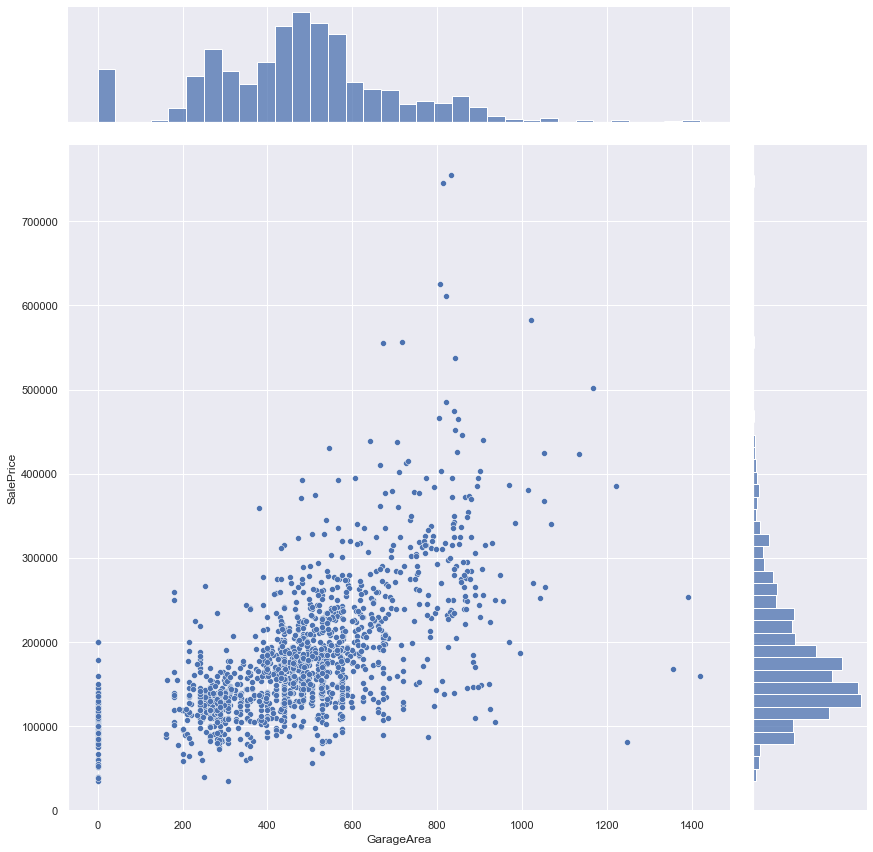

In [29]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([salePrice_train, gA_train], axis = 1).reindex(salePrice_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = dataBase, x = "GarageArea", y = "SalePrice", height = 12)

In [30]:
# Train the Linear Regression model
linreg.fit(gA_train, salePrice_train)

LinearRegression()

#### For gA_train 

Intercept 	: b =  [171676.39181499]
Coefficients 	: a =  [[18.95570025]]


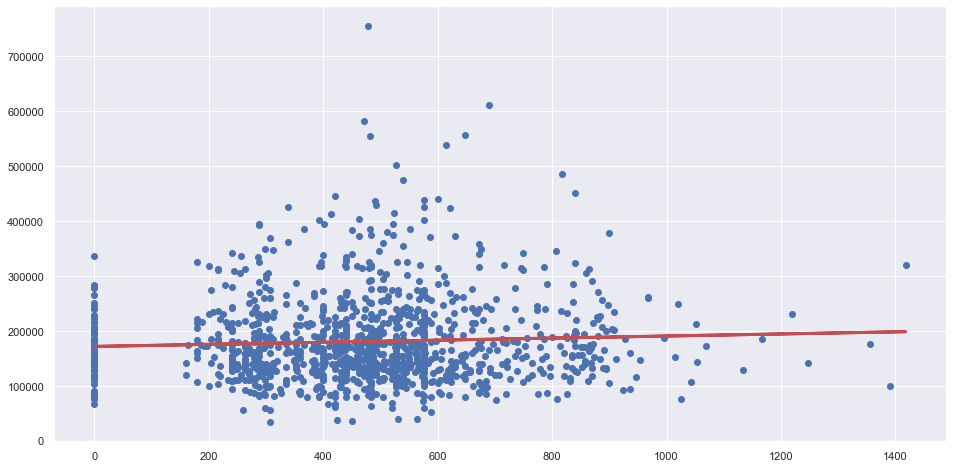

In [31]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = gA_train
regline_y = linreg.coef_ * gA_train + linreg.intercept_ 

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gA_train, salePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [32]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(gA_train, salePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(salePrice_train, salePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.0026921911491588624
Mean Squared Error (MSE) 	: 2883319244.120251


#### For gA_test

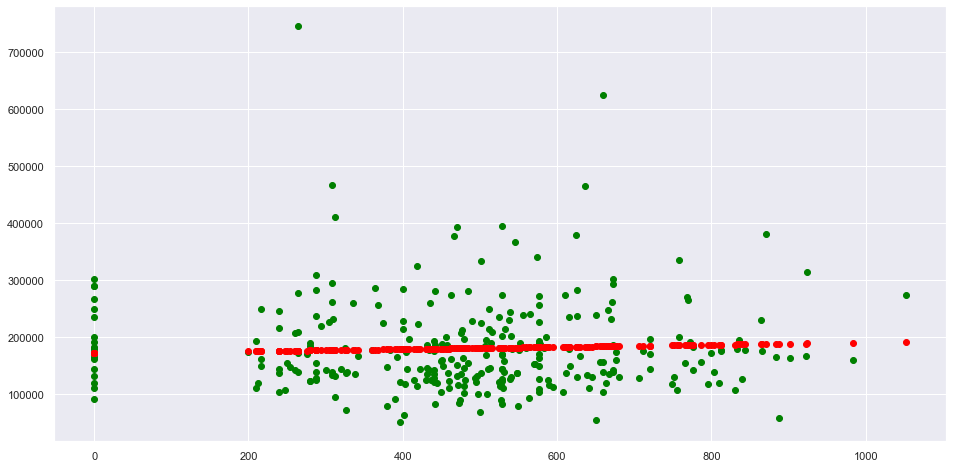

In [33]:
# Predict Total values corresponding to grLivArea_test
salePrice_test_pred = linreg.predict(gA_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(gA_test, salePrice_test, color = "green")
plt.scatter(gA_test, salePrice_test_pred, color = "red")
plt.show()

In [34]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(gA_test, salePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(salePrice_test, salePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: -0.0039047737065729393
Mean Squared Error (MSE) 	: 6731552472.26906


#### Explained Variance (R^2) and MSE for all test set of :
#### GrLivArea, TotalBsmtSF, GarageArea

> R^2 : the higher the R^2 better the model                           
> MSE : the lower the MSE the better the model 


In [55]:
print("GrLivArea")
print("Explained Variance (R^2) \t:", testgrlivarea )
print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)
print("\n")
print("TotalBsmtSF")
print("Explained Variance (R^2) \t: -0.0004950891788646494")
print("Mean Squared Error (MSE) \t: 6708689277.558462")
print("\n")
print("GarageArea")
print("Explained Variance (R^2) \t: -7.44885693277908e-05")
print("Mean Squared Error (MSE) \t: 6705868995.05048")

GrLivArea


NameError: name 'testgrlivarea' is not defined

#### Answer [2]: GrLivArea is still the best among the other 2 variables. The explained variance is the highest among the 3 and the MSE is the lowest.

## Question 3

### Refining the Models to Predict SalePrice

### 3a: Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

#### saleGr = pd.DataFrame(dataBase[['SalePrice', 'GrLivArea']])         
#### salesPrice = pd.DataFrame(dataBase['SalePrice'])                     
#### grLivArea = pd.DataFrame(dataBase['GrLivArea'])

In [39]:
from matplotlib.cbook import boxplot_stats  

Outlier for LotArea:  31


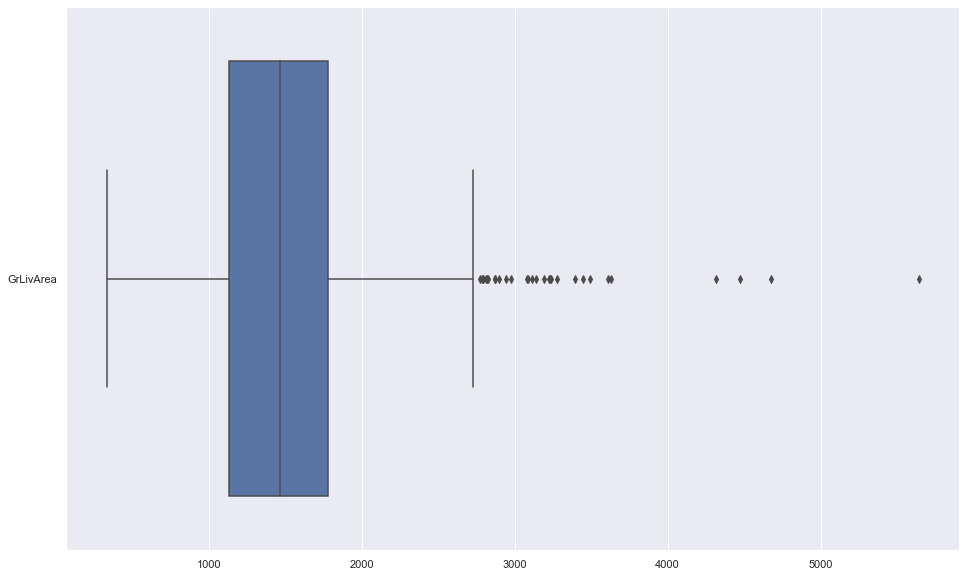

In [40]:
f = f = plt.figure(figsize=(16,10))
sb.boxplot(data = grLivArea, orient = "h")

outlier = len(boxplot_stats(dataBase.GrLivArea).pop(0)['fliers'])
print('Outlier for LotArea: ', outlier)

Outlier for SalePrice:  61


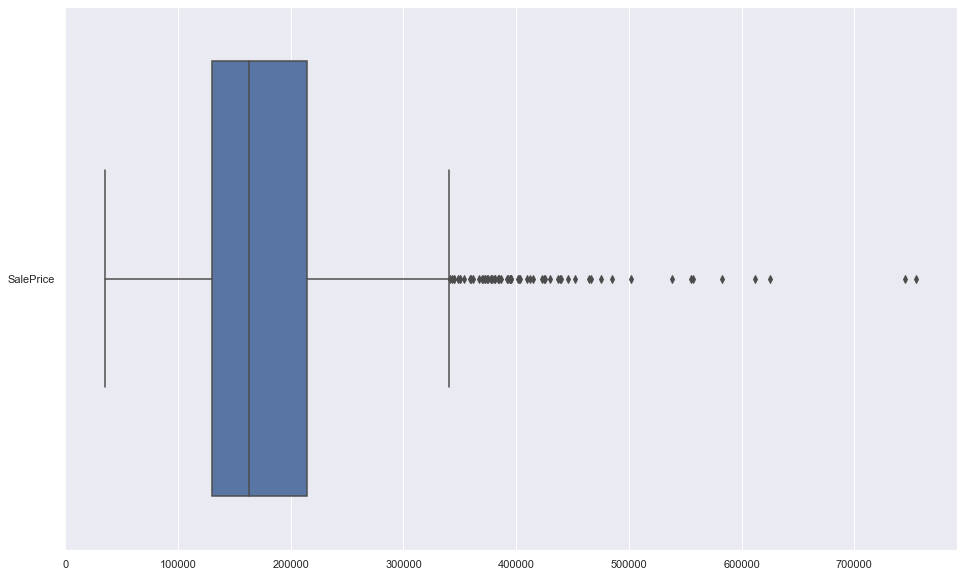

In [42]:
f = f = plt.figure(figsize=(16,10))
sb.boxplot(data = salePrice, orient = "h")

outlier = len(boxplot_stats(dataBase.SalePrice).pop(0)['fliers'])
print('Outlier for SalePrice: ', outlier)

#### GrLivArea and SalePrice

In [43]:
col = ['SalePrice','GrLivArea']

Q1 = np.percentile(saleGr[col], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(saleGr[col], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", saleGr.shape)
 
# Upper bound
upper = np.where(saleGr[col] > (Q3+1.5*IQR))
# Lower bound
lower = np.where(saleGr[col] < (Q1-1.5*IQR))

saleGr.drop(upper[0], inplace = True)
saleGr.drop(lower[0], inplace= True)

print("New shape: ", saleGr.shape)
#saleGr.describe()

Old Shape:  (1460, 2)
New shape:  (1435, 2)


/var/folders/v4/rvgfcwzd6rj1rjvpkf2cnlx40000gn/T/ipykernel_3151/1147844983.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(saleGr[col], 25, interpolation = 'midpoint')
/var/folders/v4/rvgfcwzd6rj1rjvpkf2cnlx40000gn/T/ipykernel_3151/1147844983.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(saleGr[col], 75, interpolation = 'midpoint')


In [44]:
salePrice_clean = pd.DataFrame(saleGr['SalePrice'])
grLivArea_clean = pd.DataFrame(saleGr['GrLivArea'])

In [45]:
salePrice_clean.describe()

,SalePrice
count,1435.000000
mean,175349.564460
std,66670.807914
min,34900.000000
25%,129500.000000
50%,161000.000000
75%,210000.000000
max,403000.000000


In [46]:
grLivArea_clean.describe()

,GrLivArea
count,1435.000000
mean,1492.377700
std,492.411389
min,334.000000
25%,1125.500000
50%,1456.000000
75%,1754.000000
max,5642.000000


### 3b: In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model onthe Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

In [47]:
1435 * 0.8
1435 - 1148

287

In [48]:
# Train Set : 1148 samples
salePrice_c_train = pd.DataFrame(salePrice_clean[:1148])
grLivArea_c_train = pd.DataFrame(grLivArea_clean[:1148])

# Test set : 287 samples
salePrice_c_test = pd.DataFrame(salePrice_clean[-287:])
grLivArea_c_test = pd.DataFrame(grLivArea_clean[-287:])

# Check the sample sizes
print("Train Set :", salePrice_c_train.shape, grLivArea_c_train.shape)
print("Test Set  :", salePrice_c_test.shape, grLivArea_c_test.shape)

Train Set : (1148, 1) (1148, 1)
Test Set  : (287, 1) (287, 1)


In [49]:
linreg.fit(grLivArea_c_train, salePrice_c_train)

LinearRegression()

Intercept 	: b =  [29570.17399352]
Coefficients 	: a =  [[98.37004983]]


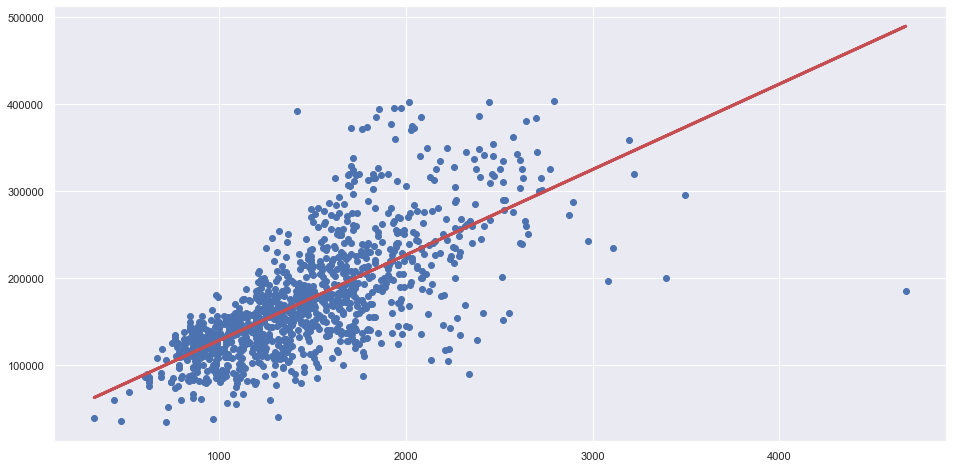

In [50]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = grLivArea_c_train
regline_y = linreg.intercept_ + linreg.coef_ * grLivArea_c_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_c_train, salePrice_c_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

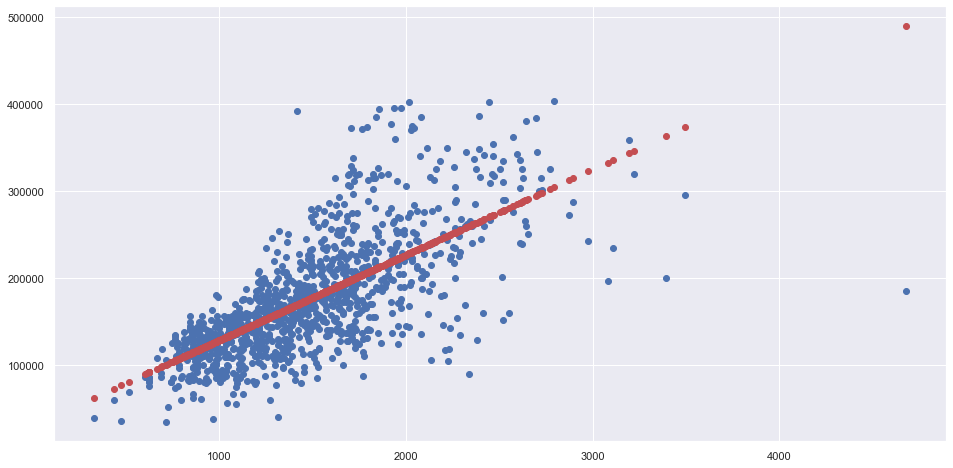

In [51]:
# Predict Total values corresponding to grLivArea_c_train
salePrice_train_pred = linreg.predict(grLivArea_c_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_c_train, salePrice_c_train)
plt.scatter(grLivArea_c_train, salePrice_train_pred, color = "r")
plt.show()

#### 3c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

## Train Data

In [52]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(grLivArea_c_train, salePrice_c_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(salePrice_c_train, salePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.49138262237259367
Mean Squared Error (MSE) 	: 2282868028.1856394


## Test Data

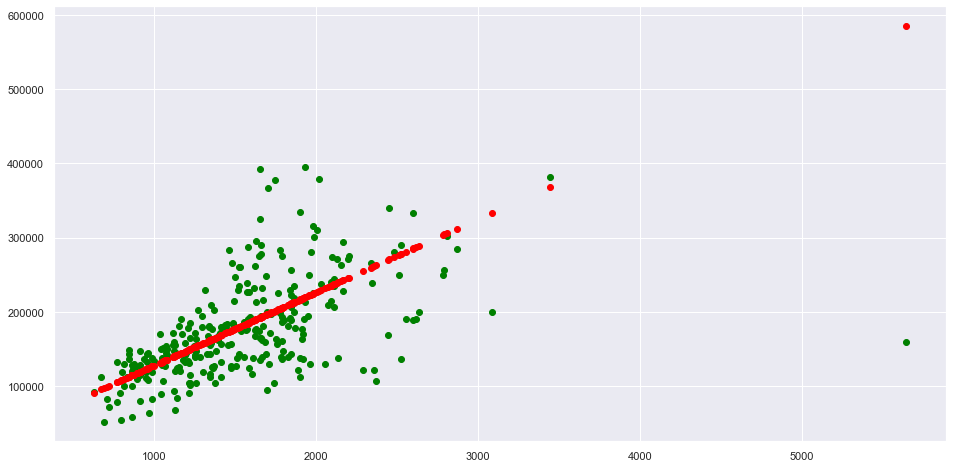

In [53]:
# Predict Total values corresponding to grLivArea_test
salePrice_test_pred = linreg.predict(grLivArea_c_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_c_test, salePrice_c_test, color = "green")
plt.scatter(grLivArea_c_test, salePrice_test_pred, color = "red")
plt.show()

In [54]:
# Explained Variance (R^2)
test_GrLiVArea = linreg.score(grLivArea_c_test, salePrice_c_test)
print("Explained Variance (R^2) \t:", test_GrLiVArea)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

GrLiVAreaMse = mean_sq_err(salePrice_c_test, salePrice_test_pred)
print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)

Explained Variance (R^2) 	: 0.22278684052957587
Mean Squared Error (MSE) 	: 3307423721.9983644


## Prediction accuracy with Outliers
> GrLivArea <br>
>Explained Variance (R^2) 	: 0.3683894557150508 <br>
>Mean Squared Error (MSE) 	: 4235182093.2124324 <br>

## Prediction accuracy without Outliers
>GrLivAra <br>
>Explained Variance (R^2) 	: 0.22278684052957454 <br>
>Mean Squared Error (MSE) 	: 3307423721.99837 <br>

#### Answer [3c]: The model with outliers is better since it have a  higher R^2 as compared to the model without the outliers. Even with a lower MSE, the model without outliers still has a lower accuracy as to the model with outliers. Removing the outliers is not helping with the explaining the data. 